In [132]:
#Importing the libraries.

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split  # for spliting the data 
from sklearn import preprocessing  # for data transformation
from sklearn.ensemble import AdaBoostClassifier  #for implementing ADABoost
from sklearn.tree import DecisionTreeClassifier, export_graphviz #for implementing Decision tree and showing the graphs
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import graphviz
from sklearn import tree
from matplotlib.pylab import rcParams
import warnings


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 15, 6

In [122]:
churn_data = pd.read_csv("Telco-Customer-Churn.csv", sep=",")
churn_data.head().T


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# Pefroming some EDA with Student_Data

### Checking the dataset for the Null values:

In [123]:
churn_data.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

** The input data doesnot contain any missing data, so we don't have to perform any Missing data treatement **

In [124]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

** From the description of the dataset feature SeniorCitizen should be a categorical data instead of numeric. **<br>
** And feature TotalCharges should be a numeric data instead of categorical. **


In [125]:
#Some of the values of TotalCharges is ' ', replacing the values of ' ' with np.NaN.
churn_data.TotalCharges.replace(' ', np.NaN, inplace=True)
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

** As the count of missing data is very less (< 2 % ), we can remove it. **

In [126]:
churn_data.shape
churn_data.dropna(inplace= True)
churn_data.shape

(7043, 21)

(7032, 21)

In [127]:
# Changing the character data type of categorical features into Categoty datatype and
# Changing the data type of SeniorCitizen into Categoty datatype

treatment_category = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'SeniorCitizen',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                     'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                     'TotalCharges', 'Churn']

for i in treatment_category:
    churn_data[i] = pd.Categorical(churn_data[i])


churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(np.float64)
churn_data.dtypes
feature_cat_n = churn_data.select_dtypes(['category']).columns.values
feature_cat_n
feature_num_n = churn_data.select_dtypes(['float64', 'int64']).columns.values
feature_num_n

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'], dtype=object)

array(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype=object)

** The discriptive analysis of the data-set. **

In [128]:
churn_data.describe(include='category').T
print("Descriptive analysis for the categocial variable\n")
churn_data.describe()
print("Descriptive analysis for the numerical variable\n")


# The min and max for both the numeric variable are different, we need to standarize it. 
churn_data[feature_num_n] = (churn_data[feature_num_n] - churn_data[feature_num_n].mean())/ (churn_data[feature_num_n].max() - churn_data[feature_num_n].min())

churn_data.describe()
print("Descriptive analysis for the numerical variable (after normalizing the variables)\n")

churn_data.head()

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


Descriptive analysis for the categocial variable



,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Descriptive analysis for the numerical variable



,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-2.636622e-17,-4.093868e-16,-4.481152e-16
std,3.457079e-01,2.993629e-01,2.615707e-01
min,-4.425604e-01,-4.631663e-01,-2.613086e-01
25%,-3.298843e-01,-2.906538e-01,-2.171533e-01
50%,-4.819417e-02,5.524171e-02,-1.022185e-01
75%,3.180030e-01,2.493959e-01,1.744100e-01
max,5.574396e-01,5.368337e-01,7.386914e-01


Descriptive analysis for the numerical variable (after normalizing the variables)



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-0.442560,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-0.347743,-0.260034,No
1,5575-GNVDE,Male,0,No,No,0.022228,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.078092,-0.045442,No
2,3668-QPYBK,Male,0,No,No,-0.428476,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.108937,-0.250998,Yes
3,7795-CFOCW,Male,0,No,No,0.177158,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.223863,-0.051067,No
4,9237-HQITU,Female,0,No,No,-0.428476,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.058724,-0.245979,Yes


In [129]:
def makeDummy(categorical):
    #this function will make the dummy vairable from the categorical variable.
    return pd.get_dummies(categorical, drop_first= True, prefix= categorical.name)

In [130]:
for i in feature_cat_n:
    data_dummy = makeDummy(churn_data[i])
    churn_data = churn_data.drop(i, axis = 1)
    churn_data = pd.concat([churn_data, data_dummy], axis = 1)

churn_data.head().T



,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
tenure,-0.44256,0.0222284,-0.428476,0.177158,-0.428476
MonthlyCharges,-0.347743,-0.0780916,-0.108937,-0.223863,0.0587243
TotalCharges,-0.260034,-0.045442,-0.250998,-0.0510674,-0.245979
gender_Male,0,1,1,1,0
SeniorCitizen_1,0,0,0,0,0
Partner_Yes,1,0,0,0,0
Dependents_Yes,0,0,0,0,0
PhoneService_Yes,0,1,1,0,1
MultipleLines_No phone service,1,0,0,1,0


In [114]:
#droping the customerID, because it is not a predictor feature 
if 'customerID' in churn_data.columns:
    churn_data.drop(['customerID'], axis=1, inplace=True)
    
x_train, x_test, y_train, y_test = train_test_split(churn_data.drop(['Churn_Yes'], axis=1), churn_data[['Churn_Yes']],test_size = 0.3, 
random_state = 0 )

x_train.head().T
print("\n")

y_train.head()


,6814,791,562,298,5156
tenure,0.346172,0.501102,-0.358053,0.106735,-0.217208
MonthlyCharges,0.290565,0.120416,0.048774,0.097033,-0.086549
TotalCharges,0.364141,0.316143,-0.203918,0.084520,-0.154206
gender_Male,0.000000,1.000000,1.000000,1.000000,1.000000
SeniorCitizen_1,1.000000,0.000000,0.000000,0.000000,0.000000
Partner_Yes,1.000000,0.000000,1.000000,1.000000,0.000000
Dependents_Yes,0.000000,0.000000,1.000000,1.000000,0.000000
PhoneService_Yes,1.000000,1.000000,1.000000,1.000000,1.000000
MultipleLines_No phone service,0.000000,0.000000,0.000000,0.000000,0.000000
MultipleLines_Yes,1.000000,1.000000,0.000000,1.000000,0.000000


,Churn_Yes
6814,0
791,0
562,0
298,0
5156,0


In [171]:
# for comparision of different Models
accuracy_train_f = [None]*4
accuracy_test_f = [None]*4

# Decision Tree (without Pruning) using gini index

In [138]:
DT_Churn = DecisionTreeClassifier(random_state=0)
DT_Churn.fit(x_train, y_train)
predictions = DT_Churn.predict(x_test)

print("Decision Tree, without Pruning")
print("\n")
print("Acuracy on training set: {:.3f}".format(DT_Churn.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(DT_Churn.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Decision Tree, without Pruning


Acuracy on training set: 99.837
Acuracy on test set: 70.758

 Confusion Matrix: 

[[1231  324]
 [ 293  262]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.81      0.79      0.80      1555
          1       0.45      0.47      0.46       555

avg / total       0.71      0.71      0.71      2110



In [139]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0
for max_depth in range(1,15):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    Decision_tree.fit(x_train, y_train)
    accuracy_train[count]=Decision_tree.score(x_train, y_train)
    accuracy_test[count]=Decision_tree.score(x_test, y_test)
    count+=1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Text(0.5,1,'Decision Tree | Accuracy vs Tree depth')

Text(0.5,0,'Tree Depth')

Text(0,0.5,'Accuracy')

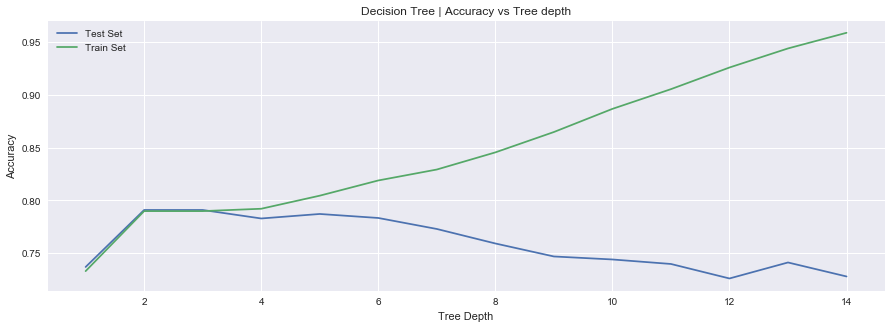

In [140]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

** The accuraccy of the train dataset increases as the tree depth increases and eventually the it reaches close to 1, which results to the overfitting of the model. <br><br>
The accuracy of the test dataset increases as the depth increases but after certain depth is starts to decreases, which is expected. <br>
From the graph of accuracy as the function of tree depth, it as clear that for this dataset the optimum tree depth is 3. **

# Decision Tree with Pruning (with depth = 3)

In [172]:
DT_Churn = DecisionTreeClassifier(random_state=0, max_depth=3)
DT_Churn.fit(x_train, y_train)
predictions = DT_Churn.predict(x_test)

print("Decision Tree, with Pruning")
print("\n")
print("Acuracy on training set: {:.3f}".format(DT_Churn.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(DT_Churn.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

accuracy_train_f[0] =  np.round(DT_Churn.score(x_train, y_train)*100,2)
accuracy_test_f[0] =  np.round(DT_Churn.score(x_test, y_test)*100,2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Decision Tree, with Pruning


Acuracy on training set: 78.992
Acuracy on test set: 79.100

 Confusion Matrix: 

[[1442  113]
 [ 328  227]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.81      0.93      0.87      1555
          1       0.67      0.41      0.51       555

avg / total       0.78      0.79      0.77      2110



## Ploting the Decision Tree for depth = 3 using gini index

0

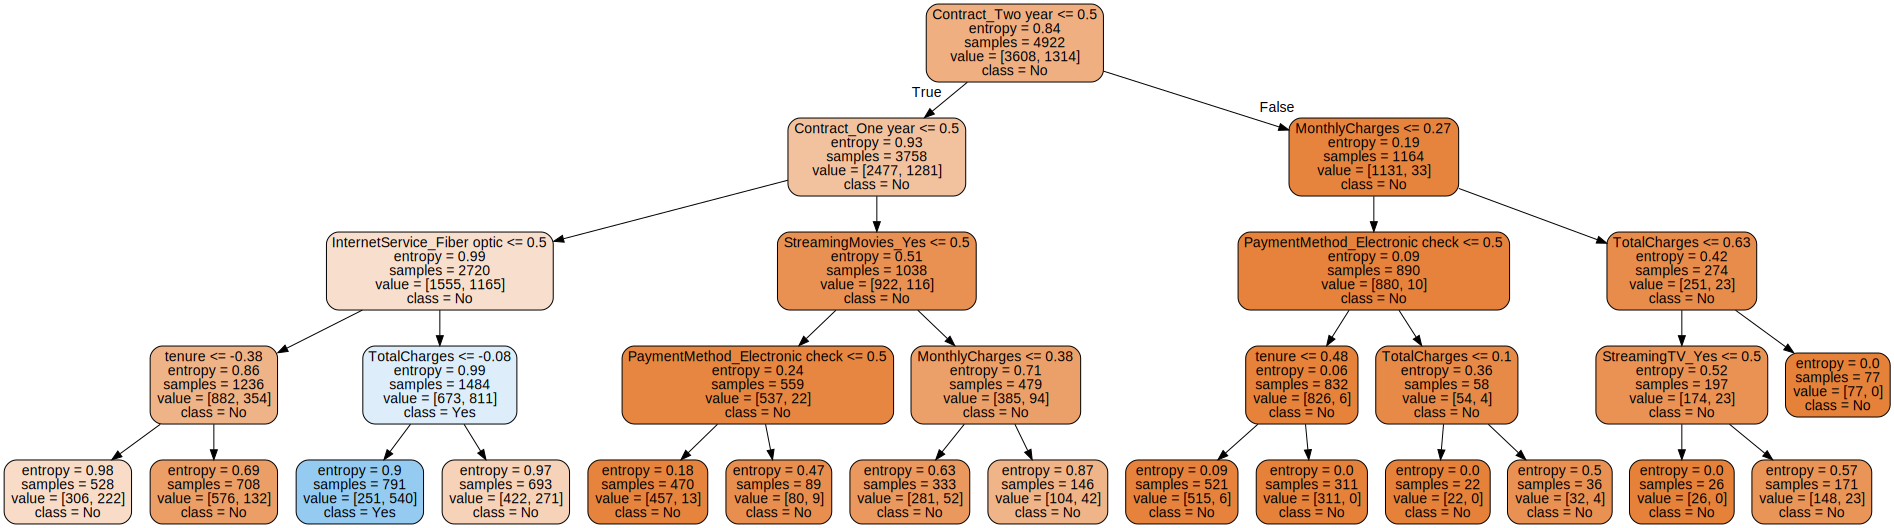

In [183]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(DT_Churn, out_file='tree.dot', 
                feature_names = list(x_train.columns),
                class_names = ['No', 'Yes'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'churntree1.png', '-Gdpi=600'])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Decision Tree (without Pruning) using Information Gain.

In [151]:
DT_Churn = DecisionTreeClassifier(random_state=0, criterion='entropy')
DT_Churn.fit(x_train, y_train)
predictions = DT_Churn.predict(x_test)

print("Decision Tree, with Pruning")
print("\n")
print("Acuracy on training set: {:.3f}".format(DT_Churn.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(DT_Churn.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Decision Tree, with Pruning


Acuracy on training set: 99.837
Acuracy on test set: 72.417

 Confusion Matrix: 

[[1283  272]
 [ 310  245]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.81      0.83      0.82      1555
          1       0.47      0.44      0.46       555

avg / total       0.72      0.72      0.72      2110



In [149]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0
for max_depth in range(1,15):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0, criterion='entropy')
    Decision_tree.fit(x_train, y_train)
    accuracy_train[count]=Decision_tree.score(x_train, y_train)
    accuracy_test[count]=Decision_tree.score(x_test, y_test)
    count+=1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Text(0.5,1,'Decision Tree | Accuracy vs Tree depth')

Text(0.5,0,'Tree Depth')

Text(0,0.5,'Accuracy')

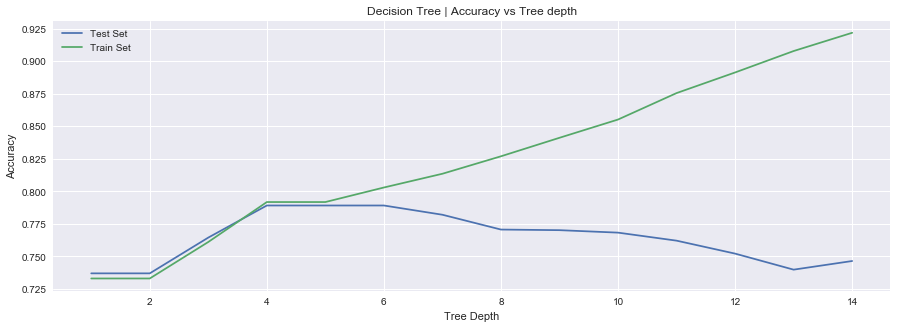

In [150]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

** The accuraccy of the train dataset increases as the tree depth increases and eventually the it reaches close to 1, which results to the overfitting of the model. <br><br>
The accuracy of the test dataset increases as the depth increases but after certain depth is starts to decreases, which is expected. <br>
From the graph of accuracy as the function of tree depth, it as clear that for this dataset the optimum tree depth is 4. **

In [173]:
DT_Churn = DecisionTreeClassifier(random_state=0, max_depth=4, criterion='entropy')
DT_Churn.fit(x_train, y_train)
predictions = DT_Churn.predict(x_test)

print("Decision Tree, with Pruning")
print("\n")
print("Acuracy on training set: {:.3f}".format(DT_Churn.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(DT_Churn.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

accuracy_train_f[1] =  np.round(DT_Churn.score(x_train, y_train)*100,2)
accuracy_test_f[1] =  np.round(DT_Churn.score(x_test, y_test)*100,2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Decision Tree, with Pruning


Acuracy on training set: 79.175
Acuracy on test set: 78.910

 Confusion Matrix: 

[[1441  114]
 [ 331  224]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.81      0.93      0.87      1555
          1       0.66      0.40      0.50       555

avg / total       0.77      0.79      0.77      2110



0

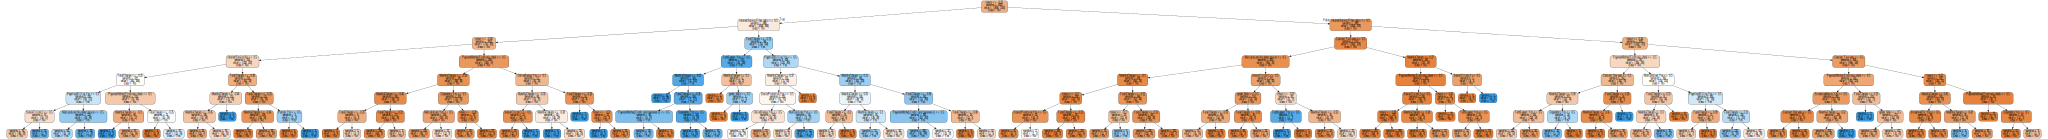

In [184]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(DT_Student, out_file='tree1.dot', 
                feature_names = list(x_train.columns),
                class_names = ['No', 'Yes'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, impurity=False)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'churntree2.png', '-Gdpi=600'])

with open("tree1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# ADA Boosting without Pruning (using gini index as spliting criteria)

In [155]:
Decision_tree= DecisionTreeClassifier( random_state=0)
Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
Adaboost_Classifier.fit(x_train, y_train)
predictions = Adaboost_Classifier.predict(x_test)
print("Decision Tree with Adaboost ")
print("\n")
print("Acuracy on training set: {:.3f}".format(Adaboost_Classifier.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Adaboost_Classifier.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Decision Tree with Adaboost 


Acuracy on training set: 99.837
Acuracy on test set: 71.943

 Confusion Matrix: 

[[1314  241]
 [ 351  204]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.79      0.85      0.82      1555
          1       0.46      0.37      0.41       555

avg / total       0.70      0.72      0.71      2110



In [156]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0
for max_depth in range(1,15):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
    Adaboost_Classifier.fit(x_train, y_train)
    accuracy_train[count]=Adaboost_Classifier.score(x_train, y_train)
    accuracy_test[count]=Adaboost_Classifier.score(x_test, y_test)
    count+=1

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Text(0.5,1,'Decision Tree with Adaboost | Accuracy vs Tree depth')

Text(0.5,0,'Tree Depth')

Text(0,0.5,'Accuracy')

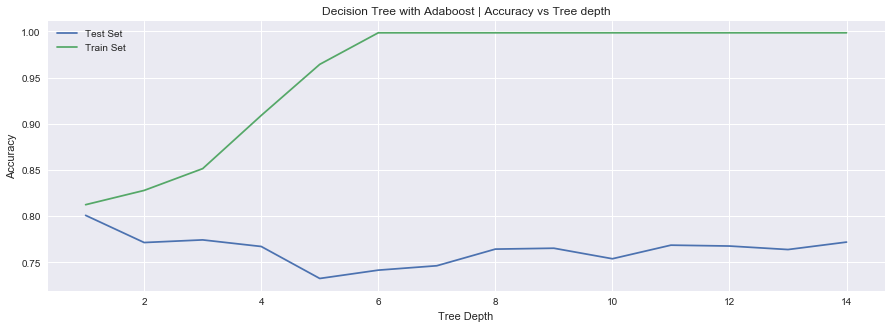

In [157]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree with Adaboost | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

## ADA Boosting with Pruning (Depth = 1)

In [174]:
Decision_tree= DecisionTreeClassifier( random_state=0, max_depth=1)
Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
Adaboost_Classifier.fit(x_train, y_train)
predictions = Adaboost_Classifier.predict(x_test)
print("Decision Tree with Adaboost ")
print("\n")
print("Acuracy on training set: {:.3f}".format(Adaboost_Classifier.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Adaboost_Classifier.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

accuracy_train_f[2] =  np.round(DT_Churn.score(x_train, y_train)*100,2)
accuracy_test_f[2] =  np.round(DT_Churn.score(x_test, y_test)*100,2)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Decision Tree with Adaboost 


Acuracy on training set: 81.247
Acuracy on test set: 80.095

 Confusion Matrix: 

[[1393  162]
 [ 258  297]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1555
          1       0.65      0.54      0.59       555

avg / total       0.79      0.80      0.79      2110



# ADA Boosting without Pruning (using information gain as spliting criteria)

In [160]:
Decision_tree= DecisionTreeClassifier( random_state=0, criterion='entropy')
Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
Adaboost_Classifier.fit(x_train, y_train)
predictions = Adaboost_Classifier.predict(x_test)
print("Decision Tree with Adaboost ")
print("\n")
print("Acuracy on training set: {:.3f}".format(Adaboost_Classifier.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Adaboost_Classifier.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Decision Tree with Adaboost 


Acuracy on training set: 99.837
Acuracy on test set: 75.877

 Confusion Matrix: 

[[1406  149]
 [ 360  195]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.80      0.90      0.85      1555
          1       0.57      0.35      0.43       555

avg / total       0.74      0.76      0.74      2110



In [161]:
accuracy_test=[None]*15
accuracy_train=[None]*15
count=0
for max_depth in range(1,15):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0, criterion='entropy')
    Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
    Adaboost_Classifier.fit(x_train, y_train)
    accuracy_train[count]=Adaboost_Classifier.score(x_train, y_train)
    accuracy_test[count]=Adaboost_Classifier.score(x_test, y_test)
    count+=1

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Text(0.5,1,'Decision Tree with Adaboost | Accuracy vs Tree depth')

Text(0.5,0,'Tree Depth')

Text(0,0.5,'Accuracy')

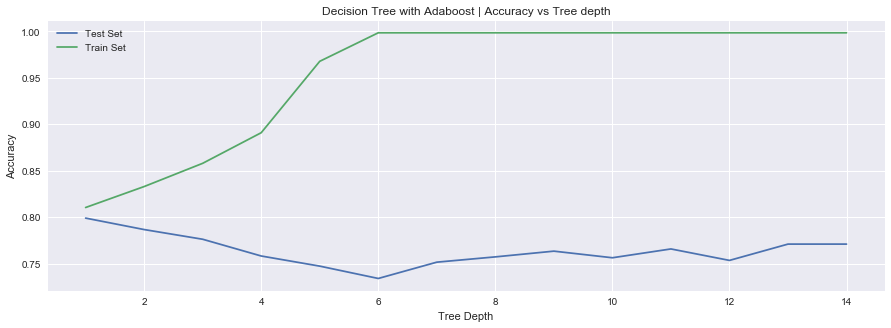

In [162]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,16),accuracy_test)
ax1.plot(range(1,16),accuracy_train)


plt.title("Decision Tree with Adaboost | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

** The accuraccy of the train dataset increases as the tree depth increases and eventually the it reaches close to 1, which results to the overfitting of the model. <br><br>
The accuracy of the test dataset increases as the depth increases but after certain depth is starts to decreases, which is expected. <br>
From the graph of accuracy as the function of tree depth, it as clear that for this dataset the optimum tree depth is 1. **

## ADA Boosting with Pruning (depth =1)

In [175]:
Decision_tree= DecisionTreeClassifier( random_state=0, max_depth=1, criterion='entropy')
Adaboost_Classifier = AdaBoostClassifier(base_estimator=Decision_tree)
Adaboost_Classifier.fit(x_train, y_train)
predictions = Adaboost_Classifier.predict(x_test)
print("Decision Tree with Adaboost ")
print("\n")
print("Acuracy on training set: {:.3f}".format(Adaboost_Classifier.score(x_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(Adaboost_Classifier.score(x_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test, predictions))

accuracy_train_f[3] =  np.round(DT_Churn.score(x_train, y_train)*100,2)
accuracy_test_f[3] =  np.round(DT_Churn.score(x_test, y_test)*100,2)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Decision Tree with Adaboost 


Acuracy on training set: 81.044
Acuracy on test set: 79.905

 Confusion Matrix: 

[[1392  163]
 [ 261  294]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1555
          1       0.64      0.53      0.58       555

avg / total       0.79      0.80      0.79      2110



# Comparision of Models on the basis of Accuracy

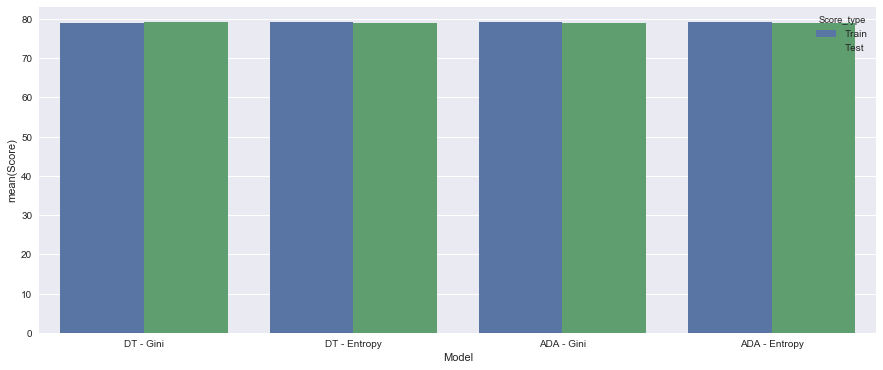

In [180]:
var = ['DT - Gini', 'DT - Entropy', 'ADA - Gini', 'ADA - Entropy']
accuracy_score = pd.DataFrame({'Model':var*2, 'Score_type':['Train']*4 +['Test']*4, 
                               'Score':accuracy_train_f + accuracy_test_f})

ax = sns.barplot(x="Model", y="Score", hue="Score_type", data=accuracy_score)